### Notes
 * Introduction to Pandas
 * Working with public datasets, introduction to Kaggle
 * Handling Missing Data
 * Scraping data
 * Quiz beta testing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## COMP 3122 - Artificial Intelligence with Python
__Week 3 lecture__

### [github.com/kamrik/ML1](https://github.com/kamrik/ML1)

### [slido.com/COMP3122](http://slido.com/COMP3122)

## Lab Test next week
 * Lab test next week during the first hour of the lab
 * Subject: NumPy - book chapter 2 covers it all (and some more)
 * A single Python file similar to those from CheckIO from first week. (TODO - demo file)
 * Submission: email your file to a special email address

## The plan for today
 * Pandas library
 * Overview of how to scrape data from the web with Python
 * Kaggle and public datasets
 * Quiz beta test

## THE reading about Pandas (important!)
 - Intro to Pandas 
   - [Video playlist](https://www.dataschool.io/easier-data-analysis-with-pandas/) (watch the first 10 videos - about 1 hour 33 min total)
   - [Text version](https://github.com/justmarkham/pandas-videos/) (GitHub)


## Using those videos and notebook
 * Notebook can be used as reference - Ctrl-F is your friend
 * Worth re-watching the videos once in a while

## More reading about Pandas
 - Pandas [Cheat Sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) (PDF) and [Cookbook](https://github.com/jvns/pandas-cookbook) (GitHub)
 - pandas.pydata.org - documentation section
 - tutorial on tutswiki - https://tutswiki.com/pandas-cookbook/chapter1/
 - Book chapter 3 (somewhat difficult for start)

## Loading data with Pandas

In [2]:
df = pd.read_csv('../../pandas-videos/data/imdb_1000.csv')
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## Select a single column

In [3]:
df['title']

0                               The Shawshank Redemption
1                                          The Godfather
2                                 The Godfather: Part II
3                                        The Dark Knight
4                                           Pulp Fiction
5                                           12 Angry Men
6                         The Good, the Bad and the Ugly
7          The Lord of the Rings: The Return of the King
8                                       Schindler's List
9                                             Fight Club
10     The Lord of the Rings: The Fellowship of the Ring
11                                             Inception
12        Star Wars: Episode V - The Empire Strikes Back
13                                          Forrest Gump
14                 The Lord of the Rings: The Two Towers
15                                          Interstellar
16                       One Flew Over the Cuckoo's Nest
17                             

## Pandas DataFrame and Series
 - Think of it as a single table in a database

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
type(df['title'])

pandas.core.series.Series

## Pandas objects
 - pd.DataFrame - the main object we use
 - pd.Series - single column from a DataFrame 
 - pd.Index and subtypes

In [6]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [7]:
type(df.columns)

pandas.core.indexes.base.Index

## df.set_index(column_name)

In [8]:
movies = df.set_index('title')
movies.head()


,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## Transposed data frame - swap rows with columns

In [9]:
top10 = movies[:10]
top10

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
12 Angry Men,8.9,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
"The Good, the Bad and the Ugly",8.9,NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
The Lord of the Rings: The Return of the King,8.9,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Schindler's List,8.9,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."


## Chaining and inplace operations

In [10]:
df.set_index('title')
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


## Descriptive stats

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


## Creating DataFrames and Series from scratch

In [10]:
s = pd.Series(np.arange(10, 16))
s.name = 'Nums'
df2 = pd.DataFrame(s)
df2

,Nums
0,10
1,11
2,12
3,13
4,14
5,15


## Plotting
 - Uses matplotlib
 - df.plot
 - df.hist

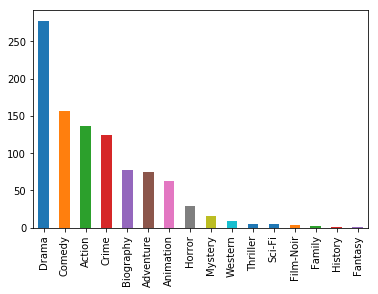

In [16]:
movies.genre.value_counts().plot(kind='bar')

## Histograms vs KDE plots - numeriacal coluns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000293B924A0F0>,
      dtype=object)

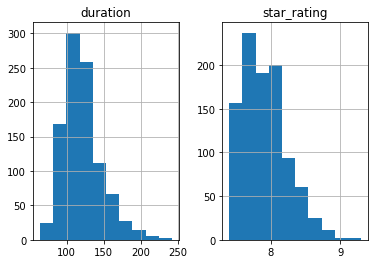

In [33]:
movies.hist()

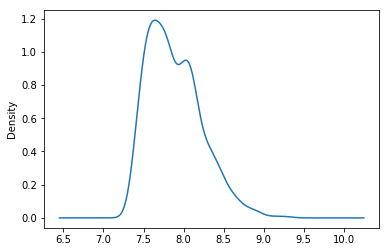

In [43]:
movies.star_rating.plot.kde()
# KDE stands for Kernel Density Estimation but Ignore the math and treat it as a histogram :)
# The math is here https://en.wikipedia.org/wiki/Kernel_density_estimation
# plt.grid()

## Quiz - code 4MRD6M
 - Same questions as before
 - You are all subscribed, but Term code is ODU209

## Web Scraping with Python
 - This is not part of this course, but important to know about
 - Be careful about pounding servers with lots of HTTP requests - they will block your IP, or present a [CAPTCHA](https://en.wikipedia.org/wiki/CAPTCHA) screen
 - [BeatifulSoup library tutorial](https://www.dataquest.io/blog/web-scraping-beautifulsoup/)
 - [Video playlist](https://www.youtube.com/watch?v=aIPqt-OdmS0&list=PLQVvvaa0QuDfV1MIRBOcqClP6VZXsvyZS) (the [author](https://www.youtube.com/channel/UCfzlCWGWYyIQ0aLC5w48gBQ) has lots of other useful tutorials)

## kaggle.com